In [1]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf

from numpy import linalg as LA

In [2]:
# Define the tickers
tickers = ['DOW','SPY','QQQ', 'IDEV', 'IEMG','AGG','TLT','SHY','LQD','IAGG','GLD','VNQ']
labels = ['DOw', 'S&P', 'NASDAQ', 'Developed', 'Emerging', 'US Bond Agg', 'US Long Treasury', 'US Short Treasury', 'US Corporate', 'International Bond', 'Gold', 'REITs']


In [3]:
# Fetch historical data
def fetch_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

# Collect data
data = fetch_data(tickers, '2021-09-01', '2024-09-01')
spy = fetch_data(['AOM'], '2021-09-01', '2024-09-01')

# Drop rows with missing data
data = data.dropna()
spy = spy.dropna()

# Calculate daily returns
returns = data.pct_change().fillna(0)
spy_returns = spy.pct_change().fillna(0)


[*********************100%***********************]  12 of 12 completed
[*********************100%***********************]  1 of 1 completed


In [15]:
(1+returns).sum(axis=1)/12

Date
2021-09-01 00:00:00+00:00    1.000000
2021-09-02 00:00:00+00:00    1.001349
2021-09-03 00:00:00+00:00    0.999893
2021-09-07 00:00:00+00:00    0.995781
2021-09-08 00:00:00+00:00    0.997331
                               ...   
2024-08-26 00:00:00+00:00    0.998401
2024-08-27 00:00:00+00:00    1.000635
2024-08-28 00:00:00+00:00    0.995864
2024-08-29 00:00:00+00:00    1.000399
2024-08-30 00:00:00+00:00    1.001820
Length: 754, dtype: float64

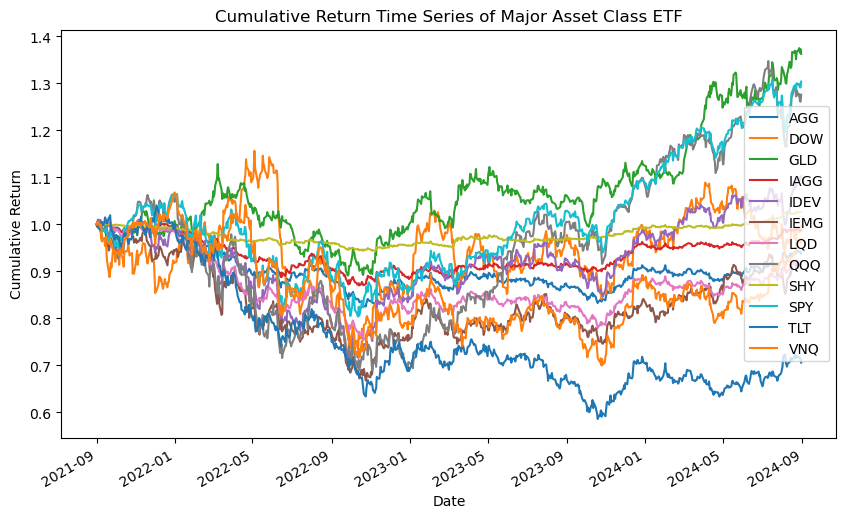

In [17]:
cum_returns = (1 + returns).cumprod()
df_cum_returns = (1+returns).cumprod()

bm_returns = (1/12)*(1+returns).sum(axis=1)
bm_cum_returns = bm_returns.cumprod()

df_cum_returns.plot(figsize=(10,6))
plt.legend(title="Stocks", loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.legend()
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.title("Cumulative Return Time Series of Major Asset Class ETF")
plt.show()

Singular values: [0.73358277 0.39426822 0.32732941 0.24626705 0.21326196 0.17975189
 0.1138437  0.06473205 0.05141819 0.04802833 0.03184794 0.01151443]
VT (transposed): [[-5.71528143e-02 -2.64638271e-01  7.31381547e-02 -1.06262497e-02
   9.16588680e-02 -7.00024822e-03  2.57277018e-02 -3.65558487e-01
   3.39916564e-02 -1.47669190e-01 -6.05548983e-01  6.23571621e-01]
 [-4.26441594e-01  3.92341882e-01  7.42007578e-01 -7.36753588e-02
   2.92092592e-01  1.08571511e-01 -9.35992904e-02 -1.05709187e-03
  -4.62688608e-02 -1.42639374e-02 -1.26732485e-05 -2.05371719e-04]
 [-9.22012826e-02 -2.63257133e-01  1.99077403e-01  6.24566744e-01
  -3.66491437e-01  5.90605472e-01 -5.97738809e-02  6.18013996e-02
   5.57633386e-03  5.33114092e-03  4.26691884e-02  8.71046517e-03]
 [-3.60569262e-02 -1.71683732e-01  3.97439701e-02 -2.96986988e-02
   6.02277471e-02  9.12983204e-03  3.02830325e-03 -5.42483603e-01
  -2.59088442e-01  7.39798699e-01  2.32963878e-01  7.31630328e-03]
 [-3.57823526e-01  1.28431164e-02 -

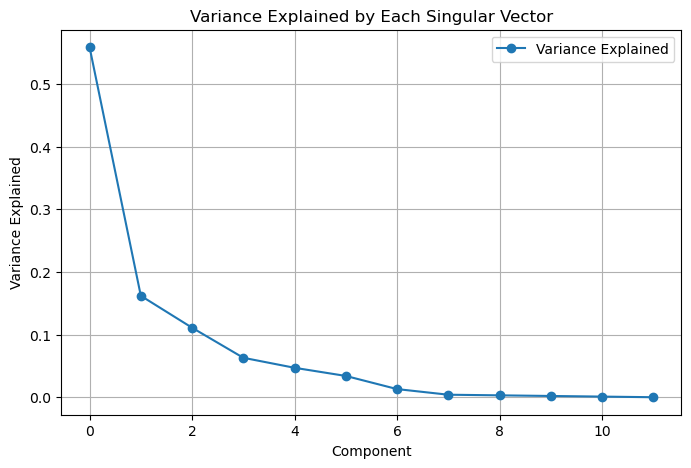

In [6]:
# Perform SVD using numpy.linalg
U, S, VT = LA.svd(returns)

# Print results
print("Singular values:", S)
print("VT (transposed):", VT.T)

# Compute variance explained by each singular vector
var_explained = np.round(S**2 / np.sum(S**2), decimals=3)
print('Variance explained by each singular vector:', var_explained)

# Plot the variance explained
plt.figure(figsize=(8, 5))
plt.plot(var_explained, 'o-', label='Variance Explained')
plt.title('Variance Explained by Each Singular Vector')
plt.xlabel('Component')
plt.ylabel('Variance Explained')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
print("First Eigenfactor  VT[0] = ", VT[0])
weight_factor_1 = abs(VT[0]) / sum(abs(VT[0]))
print("First Eigen portfolio weight = "weight_factor_1)

[0.02057806 0.15354174 0.03319738 0.01298242 0.12883557 0.12213076
 0.04033836 0.1754564  0.00440492 0.1402409  0.02672554 0.14156794]


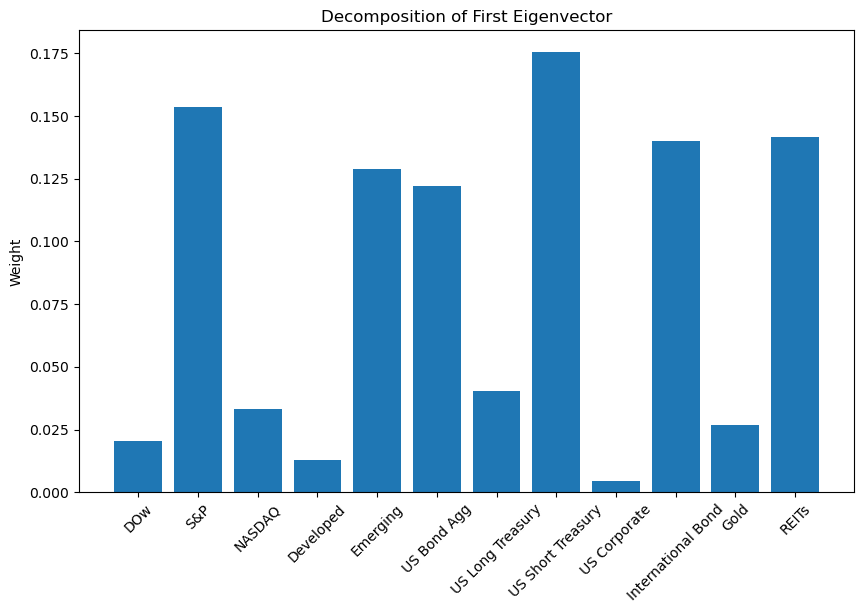

In [9]:
# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(labels, weight_factor_1)

# Adding labels and title
# plt.xlabel("Sectors")
plt.ylabel("Weight")
plt.xticks(rotation=45)

plt.title("Decomposition of First Eigenvector")

# Show the plot
plt.show()

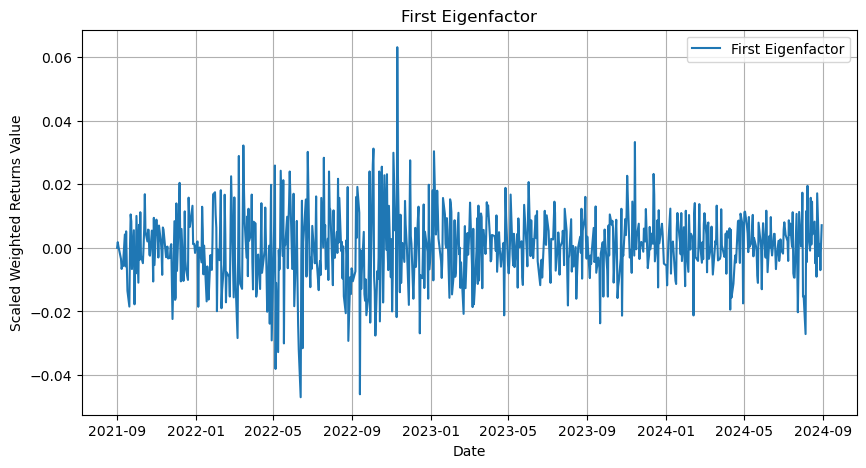

In [10]:
#First Eigenfactor
weighted_returns = returns.mul(weight_factor_1, axis=1)
scaled_weighted_returns = weighted_returns.div(np.sqrt(S[0]))

plt.figure(figsize=(10, 5))
plt.plot(scaled_weighted_returns.sum(axis=1), label='First Eigenfactor')
plt.title('First Eigenfactor')
plt.xlabel('Date')
plt.ylabel('Scaled Weighted Returns Value')
plt.legend()
plt.grid(True)
plt.show()


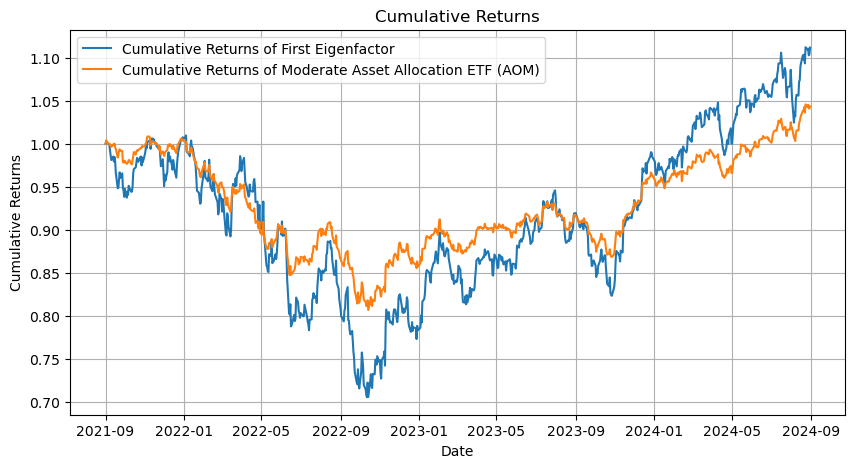

In [11]:
cumulative_returns = (1 + scaled_weighted_returns.sum(axis=1)).cumprod()
spy_cumulative_returns = (1 + spy_returns).cumprod()

plt.figure(figsize=(10, 5))
plt.plot(cumulative_returns, label='Cumulative Returns of First Eigenfactor')

plt.plot(spy_cumulative_returns, label = 'Cumulative Returns of Moderate Asset Allocation ETF (AOM)')
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


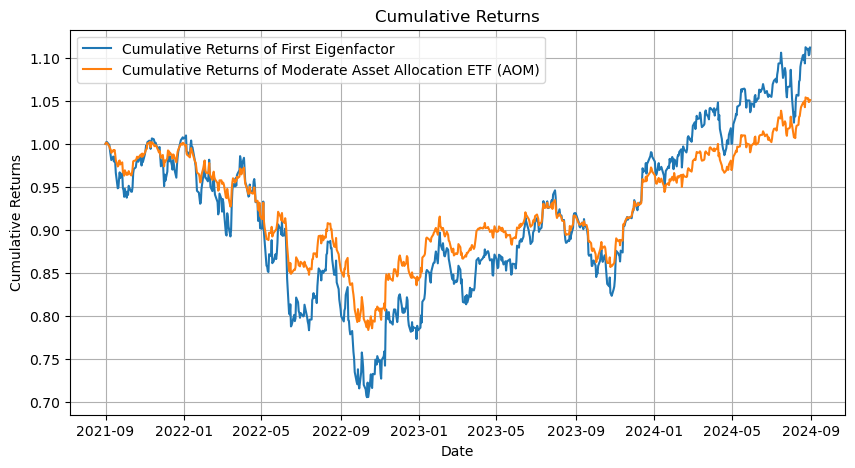

In [18]:
cumulative_returns = (1 + scaled_weighted_returns.sum(axis=1)).cumprod()

plt.figure(figsize=(10, 5))
plt.plot(cumulative_returns, label='Cumulative Returns of First Eigenfactor')

plt.plot(bm_cum_returns, label = 'Cumulative Returns of Equal Weights')
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


Correlation of each stock's cumulative returns with the cumulative returns of the first eigenfactor:
Ticker
AGG     0.569364
DOW     0.640875
GLD     0.744743
IAGG    0.837429
IDEV    0.958874
IEMG    0.810332
LQD     0.646113
QQQ     0.922467
SHY     0.912429
SPY     0.921783
TLT     0.165470
VNQ     0.509984
dtype: float64


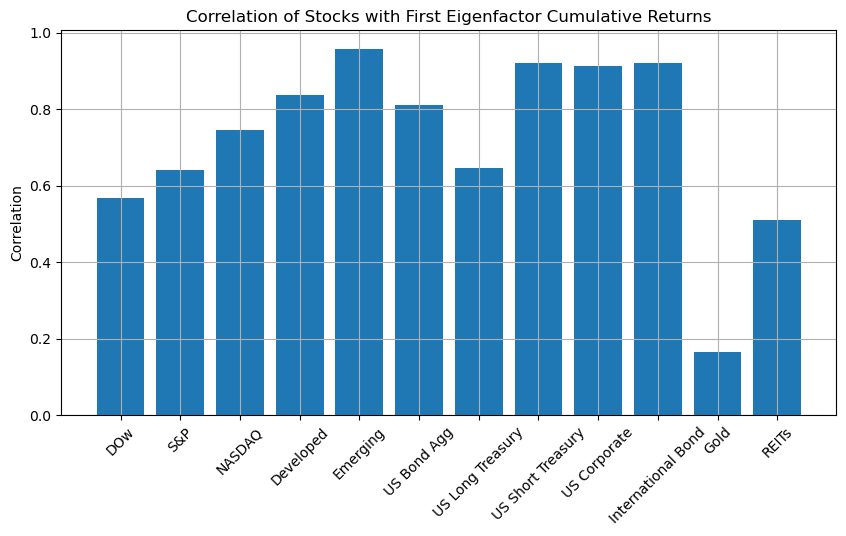

In [12]:
# Calculate cumulative returns for each stock
cumulative_returns_stocks = (1 + returns).cumprod()

# Ensure the cumulative returns of the eigenfactor is aligned in terms of dates with original data
cumulative_returns_aligned = cumulative_returns.loc[returns.index]

# Compute the correlation of each stock's cumulative returns with the eigenfactor cumulative returns
correlations = cumulative_returns_stocks.corrwith(cumulative_returns_aligned)

# Print the correlation results
print("Correlation of each stock's cumulative returns with the cumulative returns of the first eigenfactor:")
print(correlations)

# Optional: Plot the correlations as a bar chart for better visualization
plt.figure(figsize=(10, 5))
plt.bar(labels, correlations)
plt.title('Correlation of Stocks with First Eigenfactor Cumulative Returns')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
